In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
def load_data():
    with np.load("data/train_data_label.npz") as data:
        train_data = data["train_data"]
        train_label = data["train_label"]
    
    with np.load("data/test_data_label.npz") as data:
        test_data = data["test_data"]
        test_label = data["test_label"]

    return train_data, train_label, test_data, test_label

In [3]:
X_train, y_train, X_test, y_test = load_data()

1.0
0.8099553820412716
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       331
           1       0.98      0.94      0.96       432
           2       0.93      0.98      0.95       310
           3       0.90      0.97      0.93       245
           4       0.88      0.98      0.92       498
           5       0.95      0.91      0.93       247
           6       0.93      0.84      0.89       348
           7       1.00      0.92      0.96       436
           8       0.78      0.77      0.78       288
          10       0.73      0.64      0.68       331
          11       0.78      1.00      0.88       209
          12       0.88      0.68      0.77       394
          13       0.73      0.55      0.63       291
          14       0.96      0.88      0.92       246
          15       0.92      1.00      0.96       347
          16       0.94      1.00      0.97       164
          17       0.29      0.64      0.40       144
    

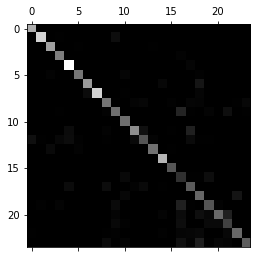

In [4]:
rf = RandomForestClassifier(n_jobs=-1, random_state=999).fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
plt.matshow(cf, cmap = plt.cm.gray, )
plt.show()

In [5]:
def define_alphabet():
    letters = {}
    for i in range(0, 26):
        letters[i] = chr(i+97)
    return letters

letters = define_alphabet()

# Why are Rs (=17) so bad?
## What should my Rs be?
letter_dic = {}
p = y_test[np.where(y_pred == 17)]
for item in p:
    if item not in letter_dic:
        if letters[item] not in letter_dic:
            letter_dic[letters[item]] = 1
        else:
            letter_dic[letters[item]] = letter_dic[letters[item]] + 1
#print(sum(letter_dic.values()))
letter_dic.pop("r")
print("Number of actual values where we predict an r:", letter_dic)

# Which Rs are not predicted?
letter_dic = {}
p = y_pred[np.where(y_test == 17)]
for item in p:
    if item not in letter_dic:
        if letters[item] not in letter_dic:
            letter_dic[letters[item]] = 1
        else:
            letter_dic[letters[item]] = letter_dic[letters[item]] + 1
#print(sum(letter_dic.values()))
letter_dic.pop("r")
print("\nIncorrectly predicting these values:", letter_dic)

Number of actual values where we predict an r: {'x': 11, 'k': 70, 'w': 25, 'y': 32, 'u': 62, 'd': 6, 'v': 22}

Incorrectly predicting these values: {'u': 26, 'l': 17, 'v': 1, 't': 3, 's': 2, 'i': 1, 'm': 1, 'w': 1}


In [6]:
rf = make_pipeline(PCA(), RandomForestClassifier(n_jobs=-1, random_state=999))

rf_param_grid = {"pca__n_components":np.arange(0.75, 1, 0.05)}
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Training set score: {rf_grid.score(X_train, y_train)}")
print(f"Test set score: {rf_grid.score(X_test, y_test)}")
print(f"Best parameters: {rf_grid.best_params_}")


Training set score: 1.0
Test set score: 0.7930842163970998
Best parameters: {'pca__n_components': 0.8500000000000001}


In [ ]:
rf = make_pipeline(PCA(), RandomForestClassifier(n_jobs=-1, random_state=999))

rf_param_grid = {"pca__n_components":np.arange(0.75, 1, 0.05),
                 "randomforestclassifier__max_depth":np.arange(1, 20, 1),
                 "randomforestclassifier__max_features":np.arange(1, 20, 1),
                 "randomforestclassifier__min_samples_leaf":np.arange(1, 20, 1),
                 "randomforestclassifier__min_samples_split":np.arange(1, 20, 1),
                 "randomforestclassifier__n_estimators":np.arange(1, 20, 1)}
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Training set score: {rf_grid.score(X_train, y_train)}")
print(f"Test set score: {rf_grid.score(X_test, y_test)}")
print(f"Best parameters: {rf_grid.best_params_}")


- pca__n_components = 0.85
- randomforestclassifier__max_depth = 12
- randomforestclassifier__max_features = 5
- randomforestclassifier__min_samples_leaf = 1
- randomforestclassifier__min_samples_split = 2
- randomforestclassifier__n_estimators = 19

In [7]:
rf = make_pipeline(PCA(0.85), RandomForestClassifier(max_depth = 12, 
                                                     max_features = 5,
                                                     min_samples_leaf = 1,
                                                     min_samples_split = 2,
                                                     n_estimators = 19,
                                                     n_jobs = -1,
                                                     random_state = 999))

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f"Training set score: {rf.score(X_train, y_train)}")
print(f"Test set score: {rf.score(X_test, y_test)} \n")

print(classification_report(y_test, y_pred))

Training set score: 0.9993443817155345
Test set score: 0.6988287785833798 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       331
           1       0.91      0.75      0.82       432
           2       0.88      0.91      0.90       310
           3       0.63      0.78      0.70       245
           4       0.90      0.93      0.92       498
           5       0.79      0.78      0.78       247
           6       0.78      0.71      0.74       348
           7       0.91      0.86      0.88       436
           8       0.51      0.44      0.47       288
          10       0.64      0.49      0.55       331
          11       0.77      0.88      0.82       209
          12       0.66      0.51      0.58       394
          13       0.53      0.46      0.49       291
          14       0.85      0.72      0.78       246
          15       0.94      1.00      0.97       347
          16       0.74      0.93      0.82       164
     